In [1]:
import matplotlib.pyplot as plt 
from tqdm import tqdm 
import numpy as np
from misc import *
periods = 70
ppp=500

#means, covs, signals, [A, dt, C, D] = load_data(get_def_path()+"{}periods/{}ppp/".format(periods,ppp))

lss=[]
params=[]
for itraj in tqdm(range(1,1000)):
    
    convergence_path = get_def_path()+"{}periods/{}ppp/convergence/{}/".format(periods,ppp, itraj)
    try:

        params.append(np.load(convergence_path+"optimal_parameters.npy"))
        lss.append(np.load(convergence_path+"loss_evolution.npy"))    
    except Exception:
        pass
    
cut_series = np.logspace(2,np.log10(ppp*periods),20)

params = np.array(params)

100%|██████████| 999/999 [00:18<00:00, 52.96it/s]


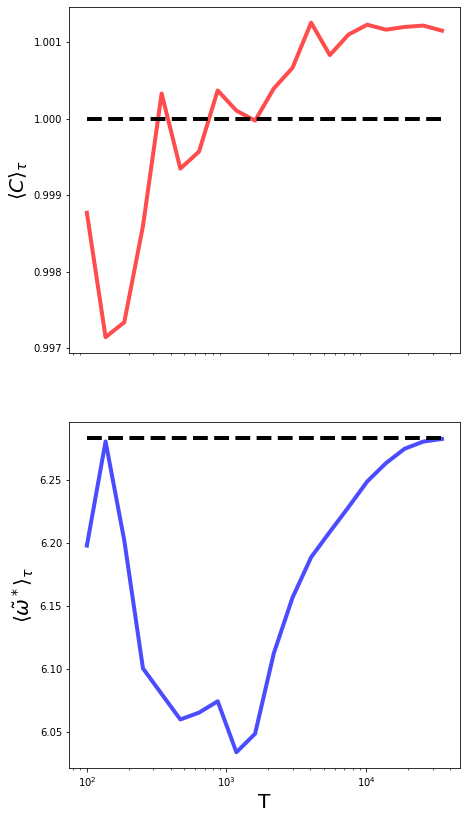

In [4]:
fig=plt.figure(figsize=(7,14))
ax1, ax2 = plt.subplot2grid((2,1),(0,0)), plt.subplot2grid((2,1),(1,0))
ax1.plot(cut_series, np.mean(np.array(lss),axis=0),  linewidth=4, alpha=.7, color="red")
ax2.plot(cut_series, np.mean(np.array(params),axis=0),  linewidth=4, alpha=.7, color="blue")
for i,a in enumerate([ax1,ax2]):
    a.set_xscale('log')
    a.plot(cut_series, np.ones(len(cut_series))*[1,2*np.pi][i], '--', linewidth=4,color="black")
    a.tick_params(axis='both', which='major', labelsize=10)

ax2.set_xlabel("T",size=20)
ax1.set_ylabel(r'$\langle C \rangle_\tau$', size=20)
ax2.set_ylabel(r'$\langle\tilde{\omega}^*\rangle_\tau$', size=20)
ax1.set_xticks([])
plt.savefig("figures/convergence_optimal_parameters_cost_70periods.pdf")

Let's check what numpy understands as np.std and np.mean

In [107]:
params.shape ## (N_traj, n_truncations)

(999, 20)

In [92]:
m = np.zeros(params.shape[1])
for c in range(params.shape[1]):
    for t in range(params.shape[0]):
        m[c]+=params[t,c]
m = m/params.shape[0]

In [96]:
np.mean(params,axis=0) - m

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [102]:
s = np.zeros(params.shape[1])
for c in range(params.shape[1]):
    for t in range(params.shape[0]):
        s[c]+=(params[t,c] - m[c])**2
s = np.sqrt(s/params.shape[0])

In [106]:
np.std(params,axis=0) - s

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

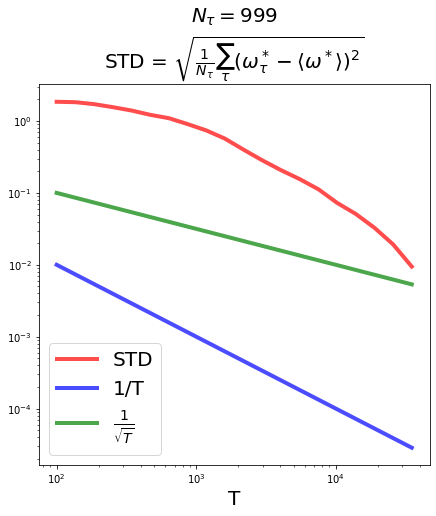

In [117]:
fig=plt.figure(figsize=(7,7))
ax=plt.subplot(111)

tit1 = r'$N_\tau = $' + "{}\nSTD = ".format(len(params))
tit1+= r'$\sqrt{\frac{1}{N_\tau} \sum_\tau (\omega^*_\tau - \langle\omega^*\rangle)^2}$'
ax.set_title(tit1, size=20)
ax.plot(cut_series, np.std(params,axis=0), linewidth=4, alpha=.7, color="red", label="STD")
ax.plot(cut_series, 1/cut_series, linewidth=4, alpha=.7, color="blue", label="1/T")
ax.plot(cut_series, 1/np.sqrt(cut_series), linewidth=4, alpha=.7, color="green", label=r'$\frac{1}{\sqrt{T}}$')

ax.set_yscale('log')
ax.set_xscale('log')

ax.set_xlabel("T",size=20)
#ax.set_ylabel("std single param",size=20)
ax.legend(prop={"size":20})
plt.savefig("figures/convergence_problem_maybe.pdf")